In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import roc_auc_score

In [2]:
# Load Titanic dataset
titanic = pd.read_csv('Titanic-Dataset.csv')

In [3]:
# Convert categorical variables to numeric
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic['Embarked'] = titanic['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Fill in missing values
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

# Split the data into features and target
X = titanic.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic['Survived']

In [4]:
titanic.loc[titanic['Age'].isnull(),'Age'] = np.round(titanic['Age'].mean()) # replacing the null values with mean of the row as there are not any outliers
titanic.loc[titanic['Embarked'].isnull(),'Embarked'] = titanic['Embarked'].value_counts().index[0]

<AxesSubplot:>

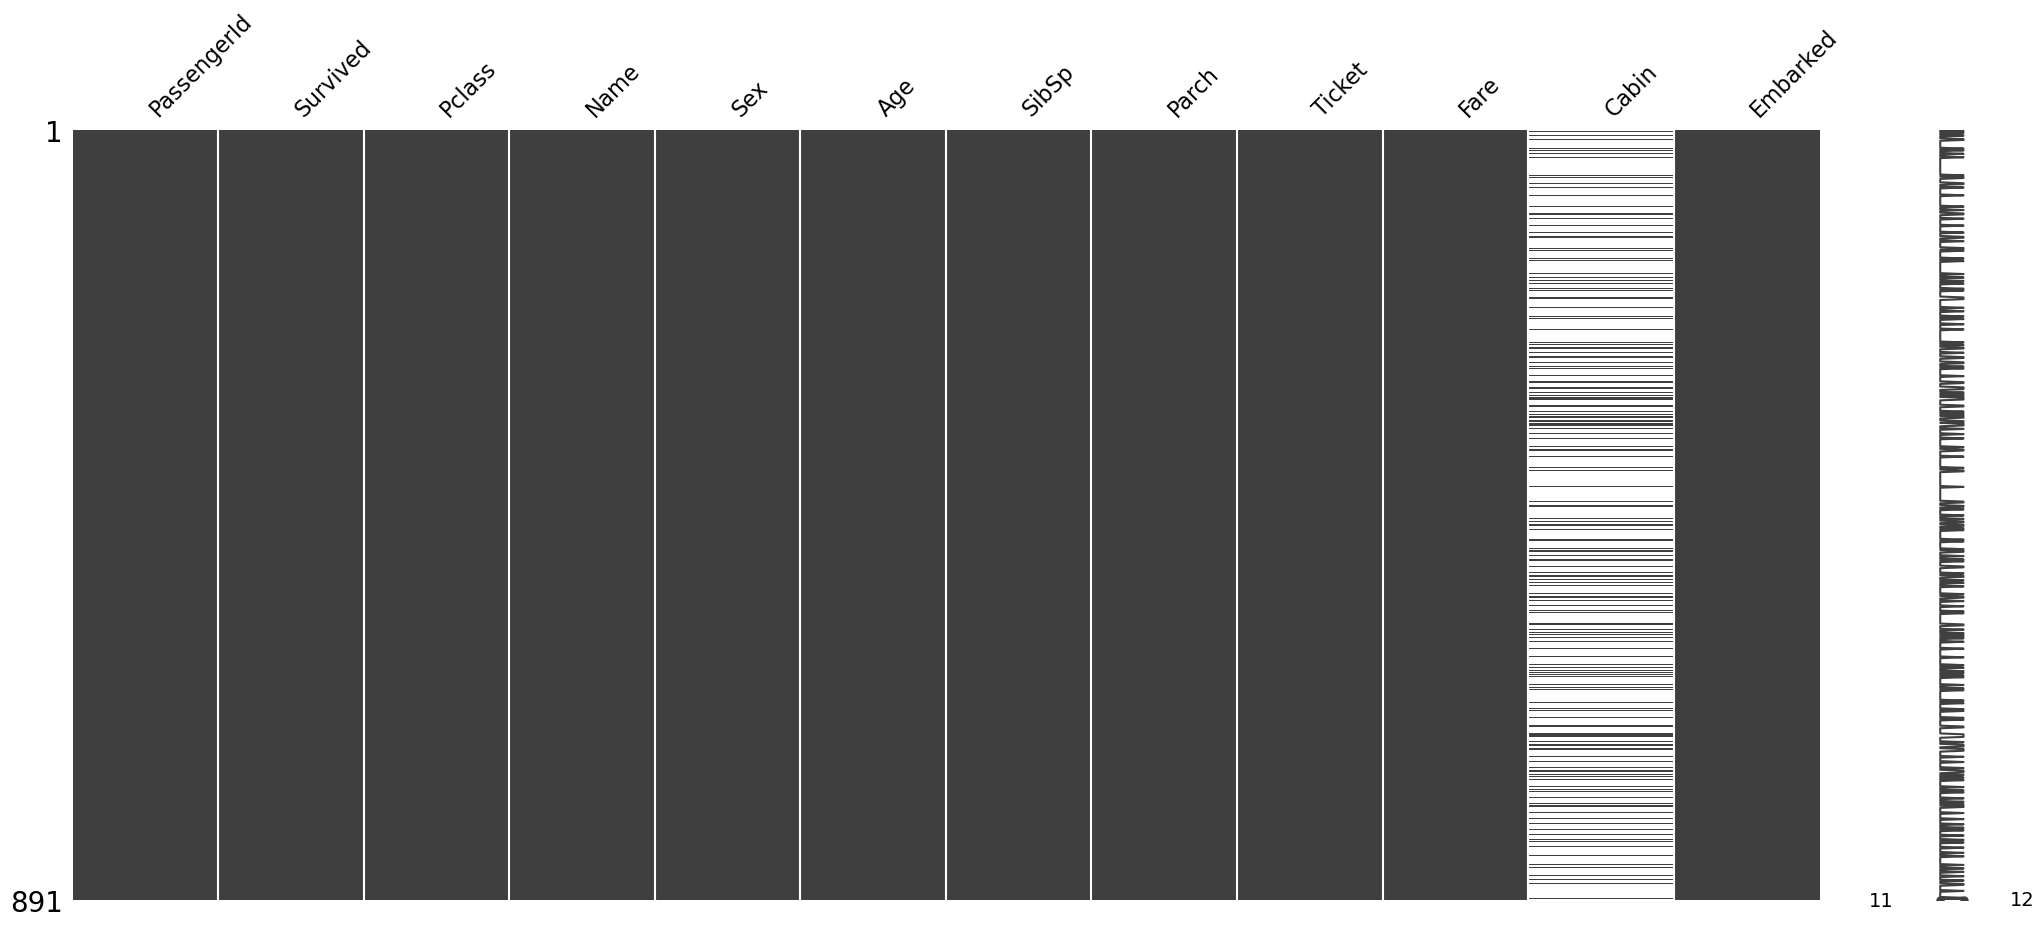

In [5]:
import missingno as mns # Visualizing the null values
mns.matrix(titanic)

In [6]:
import seaborn as sns

<AxesSubplot:xlabel='Survived', ylabel='count'>

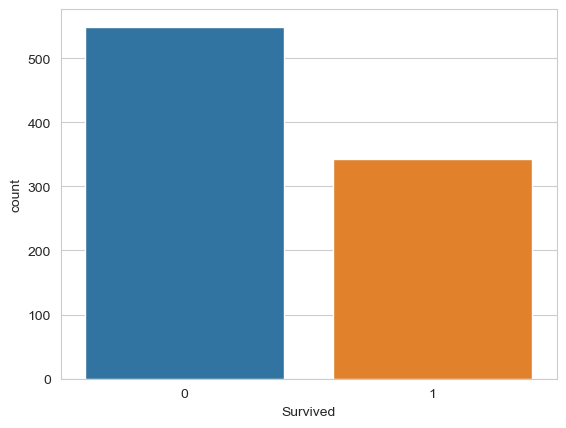

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=titanic) # Graph to see how many people have survived the clash

<AxesSubplot:xlabel='Survived', ylabel='count'>

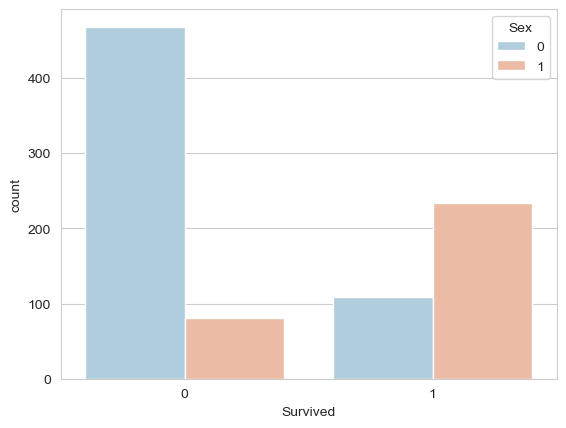

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r') # Graph to visualize how many male & female have survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

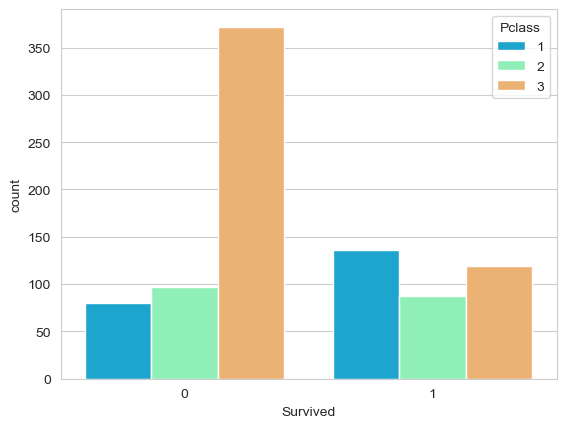

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')# Graph to visualize which class people have survived

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

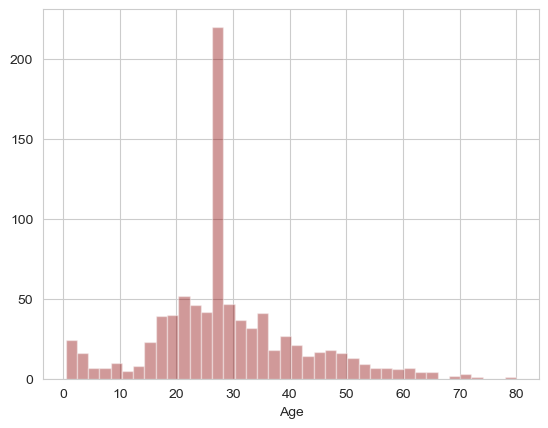

In [10]:
sns.distplot(titanic['Age'].dropna(),kde=False,color='darkred',bins=40)# Graph to visualize what age group people are onboard

<AxesSubplot:>

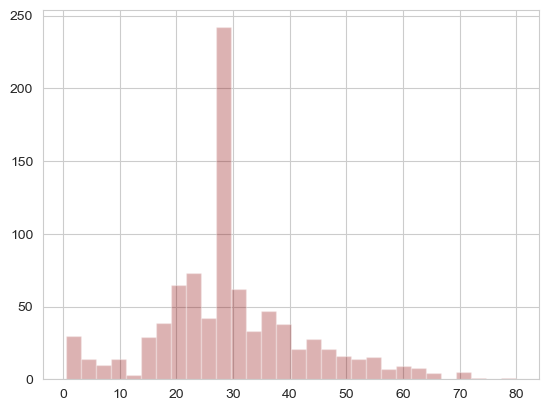

In [11]:
titanic['Age'].hist(bins=30,color='darkred',alpha=0.3) # Just changing the size of bins

<AxesSubplot:xlabel='SibSp', ylabel='count'>

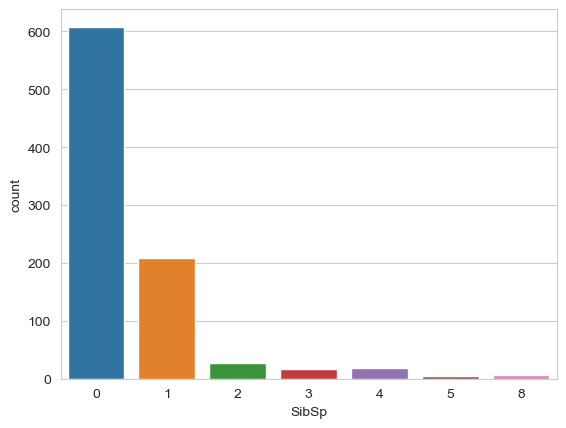

In [12]:
sns.countplot(x='SibSp',data=titanic) # Graph to see how many passengers have siblings

<AxesSubplot:>

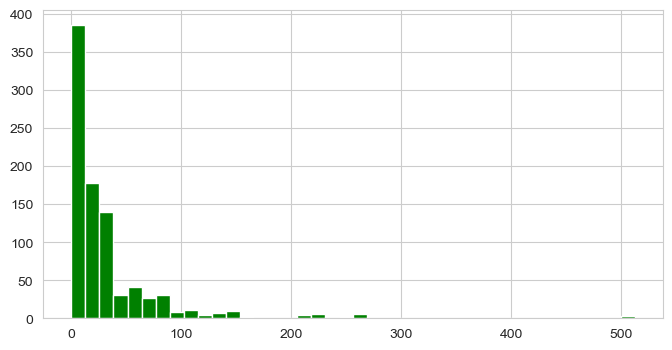

In [13]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4)) # Graph to visualize how much fare was paid 

In [14]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

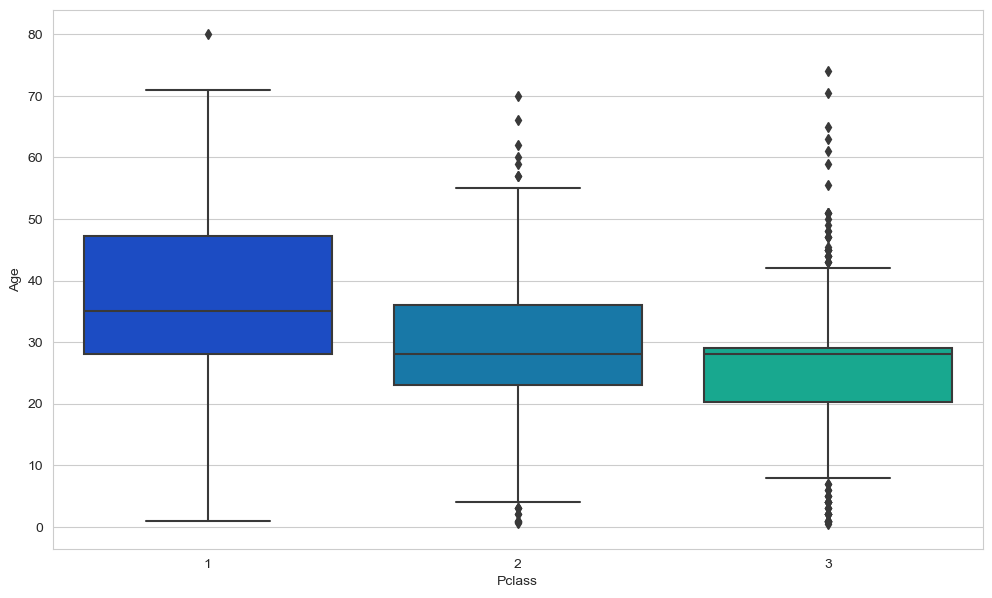

In [15]:

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter') # Using box-plot to check what age group people are present in which class

In [16]:
# using module to replace age in plclass 
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
titanic['Age']=titanic[['Age','Pclass']].apply(impute_age,axis=1)# calling the above function for replace

<AxesSubplot:>

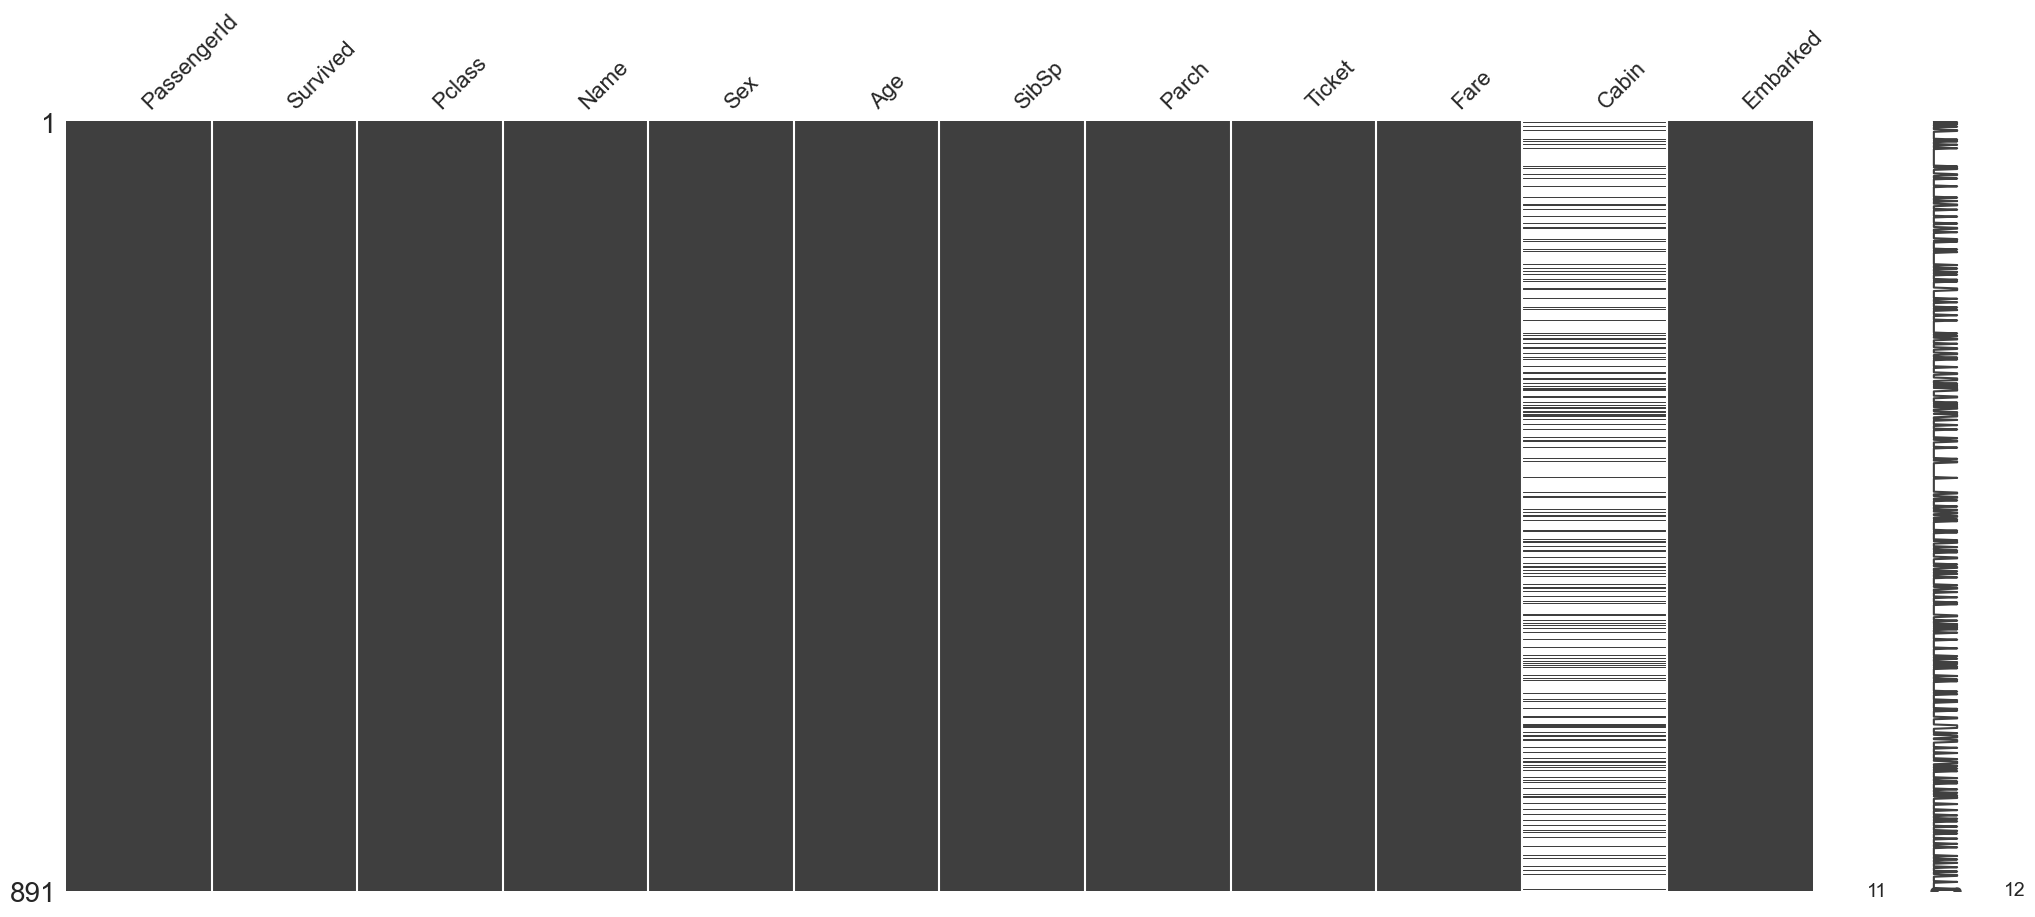

In [18]:
mns.matrix(titanic) 

In [19]:
# Dropping the cabin column

titanic.drop('Cabin',axis=1,inplace=True)

In [20]:

titanic.head() # After droping 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


<AxesSubplot:>

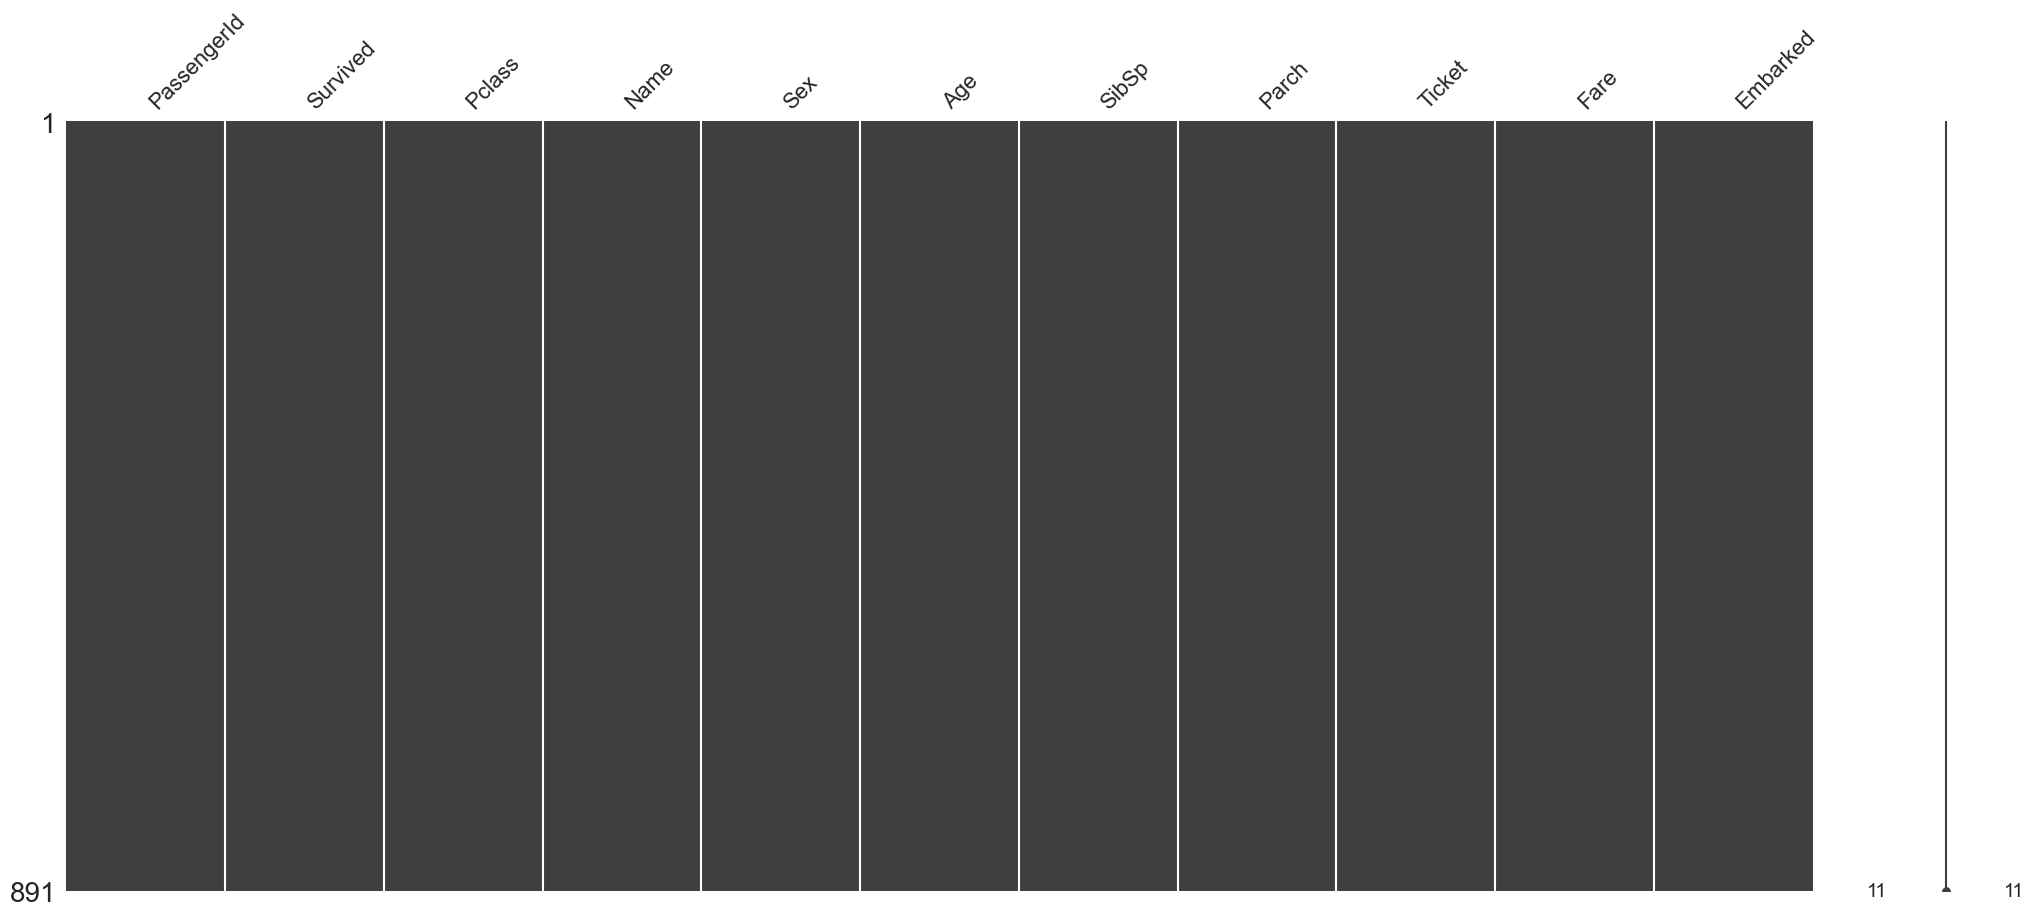

In [21]:
mns.matrix(titanic)

In [22]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True)
embark = pd.get_dummies(titanic['Embarked'],drop_first=True) # Converting categorical into numerical using get_dummies

In [23]:
# Define the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the hyperparameters to be tuned using random search
params = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [24]:
# Define the mean squared error scorer
mse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform the random search with 5-fold cross validation
random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=50,
                                   cv=5, random_state=42, n_jobs=-1,
                                   scoring=mse_scorer)
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500, 800,
                                                         1000]},
                   random_state=42,
                   scoring=make_scorer(mean_squared_error, squared=False))

In [25]:
# Print out the best hyperparameters and mean squared error
print("Best hyperparameters:", random_search.best_params_)
print("Best mean squared error:", random_search.best_score_)

Best hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
Best mean squared error: 0.3781086297965558


In [26]:
numeric_variables = list(X.dtypes[X.dtypes!="object"].index)
X[numeric_variables].head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,38.0,1,0,71.2833,1.0
2,3,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,35.0,1,0,53.1000,0.0
4,5,3,0,35.0,0,0,8.0500,0.0


In [27]:
# building the model
model = RandomForestRegressor(n_estimators = 100, oob_score=True,random_state=42)
model.fit(X[numeric_variables],y)

RandomForestRegressor(oob_score=True, random_state=42)

In [28]:
rf = RandomForestRegressor()

In [29]:
model.oob_score_

0.39393255073923106

In [30]:
print(random_search.best_params_)

{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}


In [31]:
y_oob = model.oob_prediction_
print("C-stat: ",roc_auc_score(y,y_oob))

C-stat:  0.8507120868351814
